# Mesh2d refine based on gridded samples with a costline

In [1]:
import matplotlib.pyplot as plt

plt.close("all")
import xarray as xr
import numpy as np
import meshkernel
import contextily as ctx
from meshkernel import (
    MakeGridParameters,
    MeshKernel,
    GriddedSamples,
    ProjectionType,
    MeshRefinementParameters,
    RefinementType,
)

mk_version = meshkernel.__version__

### Sampled bathymetry

In [2]:
# Sampled GEBCO bathymetry
lon_np = np.array(
    [
        -68.54791667,
        -68.46458333,
        -68.38125,
        -68.29791667,
        -68.21458333,
        -68.13125,
        -68.04791667,
        -67.96458333,
    ]
)
lat_np = np.array(
    [
        11.80208333,
        11.88541667,
        11.96875,
        12.05208333,
        12.13541667,
        12.21875,
        12.30208333,
        12.38541667,
        12.46875,
        12.55208333,
    ]
)
values_np_2d = np.array(
    [
        [-1700, -1769, -1688, -1641, -1526, -1291, -1121, -1537],
        [-1561, -1674, -1354, -757, -837, -838, -1080, -1466],
        [-1630, -1390, -710, -562, -479, -753, -1246, -1703],
        [-1553, -1446, -1147, -248, -175, -712, -1621, -1920],
        [-1503, -1380, -1080, -305, 18, -543, -1563, -2241],
        [-1477, -1571, -3, 100, 11, -891, -1521, -2446],
        [-1892, -1808, 16, -3102, -2015, -1302, -1484, -2581],
        [-2516, -2091, -1957, -2647, -1422, -1486, -2340, -2702],
        [-2689, -2353, -2614, -3612, -3058, -3017, -3181, -2848],
        [-3110, -3025, -3861, -3927, -3818, -4162, -4386, -4504],
    ]
)
values_np = values_np_2d.flatten().astype(np.float32)

### Generate regular grid

In [3]:
lon_min, lon_max, lat_min, lat_max = -68.55, -67.9, 11.8, 12.6
dx = dy = 0.05
make_grid_parameters = MakeGridParameters(
    angle=0,
    origin_x=lon_min,
    origin_y=lat_min,
    upper_right_x=lon_max,
    upper_right_y=lat_max,
    block_size_x=dx,
    block_size_y=dy,
)

mk = MeshKernel(projection=ProjectionType(1))
mk.curvilinear_compute_rectangular_grid_on_extension(make_grid_parameters)
mk.curvilinear_convert_to_mesh2d()  # convert to ugrid/mesh2d

### Perform refinement

In [4]:
gridded_samples = GriddedSamples(
    x_coordinates=lon_np, y_coordinates=lat_np, values=values_np
)

In [5]:
mesh_refinement_parameters = MeshRefinementParameters(
    min_edge_size=300,  # always in meters
    refinement_type=RefinementType(1),  # Wavecourant/1,
    connect_hanging_nodes=True,  # set to False to do multiple refinement steps (e.g. for multiple regions)
    smoothing_iterations=2,
    max_courant_time=120,
)

In [6]:
mk.mesh2d_refine_based_on_gridded_samples(
    gridded_samples=gridded_samples,
    mesh_refinement_params=mesh_refinement_parameters,
    use_nodal_refinement=True,
)

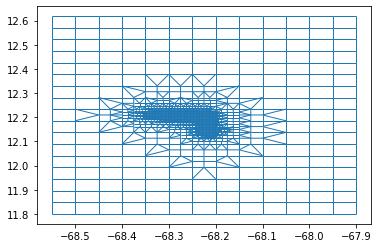

In [7]:
fig, ax = plt.subplots()
mk.mesh2d_get().plot_edges(ax=ax, linewidth=1)